In [3]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


/Users/jaynewby/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Exam Rules
  1. You can use your own notes and any class materials posted eClass, including Jupyter notebooks and anything else posted or linked to in eClass (however, see 4 below)
  2. You cannot use any external internet sources (e.g., Google, Wikipedia, StackExchange, etc)
  3. You can use your own books as long as they are paper or PDF
  4. You cannot use any sort of computer search functionality (internet or otherwise)
  5. You must work alone for this exam
  6. You may use any theorems proved in class
  7. Your answers do not need to be rigorous proofs, but try to be precise
  
  
 ## You must turn in your exam before midnight on Saturday (Oct 8th)
 ### (Even if you start it during the day on Saturday.)
 
 -------------------------------------------

# Q1
Consider using the function
$$g(x) = x - \frac{f(x)}{\left[\frac{f(x + f(x)) - f(x)}{f(x)}\right]}$$
for a fixed point iteration to locate the root of a given function $f(x)$.

# A 
Assume that the function $f(x)$ is sufficiently smooth, with $f'(\hat{x}) \neq 0$. Given an initial guess $x_0$ that is sufficiently close to a root $\hat{x}$, determine the convergence rate of the fixed point iteration
$$ x_{t} = g(x_{t-1}).$$

-------------------
## Solution
Based on the lecture notes from Week 3 (Wednesday), we want to find out which derivatives $g^{(j)}(\hat{x})$ vanish. In particular, we want to find 
$$ n = \min \{ j = 1, 2, \ldots | g^{(j)}(\hat{x}) \neq 0 \}. $$
There are several approaches that can be used to answer this question. I will show one approach here. 

We notice that the function,
$$u(x) = \frac{f(x + f(x)) - f(x)}{f(x)},$$
looks like a finite difference approximation. As $f\to 0$ we expect $u\to f'$. Indeed, using L'Hopital's rule we have
$$\lim_{x\to\hat{x}}u(x) = \frac{f'[1 + f'] - f'}{f'} = f'(\hat{x}).$$
With this in mind, it seems that our method is approximately the same as Newton's method. Let's proceed based on this observation by rewritting our function with
$$g(x) = x - \frac{f(x)}{f'(x)} + h(x), \qquad h(x) = \frac{f(x)}{f'(x)} - \frac{f(x)}{u(x)} = \frac{f(x)[u(x) - f'(x)]}{f'(x)u(x)},$$
where $h(x)$ bottles up the amount by which our method differs from Newton's method. The rest of the analysis proceeds exactly as with Newton's method (including part B) provided that $h(\hat{x}) = h'(\hat{x}) = 0$. 
We do not need L'Hopital's rule to see that $h(\hat{x}) = 0$ since the denominator does not vanish. It still remains to show that $h'(\hat{x}) = 0.$ Taking the derivative, we have
$$h'(x) = \frac{f'u(f'u + fu' - (f')^2 - ff'') - f(u-f')(f'u' + f''u)}{(f')^2u^2}.$$
We can take the limit $x\to \hat{x}$ without L'Hopital's rule, and we have $h'(\hat{x}) = 0$. Thus, we have shown that the method converges at least quadratically.

# B
Determine the convergence rate if $f'(\hat{x})=0$ and $f''(\hat{x}) \neq 0$.

------------------
## Solution
As discussed in the solution to part A, we want to show that this method behaves very similarly to Newton's method. In the case here, where $f'(\hat{x})=0$ and $f''(\hat{x})\neq 0$, that would involve showing that $g'(\hat{x}) = 1/2$. This was shown to be the case for Newton's method during lecture (Week 3 - Wednesday). Continuing our approach from part A, we need only show that $h(\hat{x}) = h'(\hat{x}) = 0$. This can be done through application of L'Hopital's rule. However, another allowable approach, also taken from the same Week 3 lecture, is to assume that $f(x) = x^2$. In this case we have
$$u(x) = \frac{(x + x^2)^2 - x^2}{x^2} = 2x + x^2,$$
and
$$h(x) = \frac{x^2(2x + x^2) - 2x^3}{2x(2x + x^2)} = \frac{x^2}{4 + 2x}.$$
For small $x$, this function behaves like $x^2/4$, and it follows that $h(0) = h'(0) = 0$.

We conclude that convergence will be linear.

# Q2

# A
Write a function in Python to compute the nodes and weights for the polynomial interpolation of the function
$$f(x) = \tanh(x), \quad x \in [-5, 5],$$
using $n+1$ Chebyshev nodes.

# B
Write a function in Python to use the Barycentric formula to evaluate a Lagrange polynomial at a given set of evaluation points.

# C
In Python, plot the function $f(x)$ using 200 points. Plot the interpolating polynomial, with 5 nodes, using 200 evaluation points.

# D
Using the results shown in lecture, determine a formula for a bound of the absolute error as a function of the number of nodes.

# E
Using the formula from part D, determine the number of nodes needed to guarantee an absolute error that is no larger than $10^{-6}$.

# F
In Python, plot the absolute error $\vert f(x) - p(x)\vert$ using the number of nodes determined in part D.

In [4]:
def baryfit_chebyshev(n):
    j = arange(n+1)
    w = (-1.)**j
    w[0] = w[0]*0.5
    w[-1] = w[-1]*0.5
    return w
def chebyshev_nodes(a, b, n):
    j = arange(n+1)
    return (a + b)/2 - (b - a)/2*cos(j*pi/n)
def baryeval(x, xnodes, ynodes, weights):
    n = xnodes.size - 1
    m = x.size
    numerator = zeros(m)
    denominator = zeros(m)
    for k in arange(m): ## loop over each evaluation point in `x`
        for j in arange(n+1): # j = 0, 1, ..., n
            if x[k] == xnodes[j]: # check if x = x_j
                numerator[k] = ynodes[j] ## p(x_j) = y_j
                denominator[k] = 1.
                break ## this will end the inner-most loop (skip to the next value of k)
            numerator[k] = numerator[k] + ynodes[j]*weights[j]/(x[k] - xnodes[j])
            denominator[k] = denominator[k] + weights[j]/(x[k] - xnodes[j])
    p_of_x = numerator/denominator
    return p_of_x


def f(x):
    return tanh(x)


a = -5.
b = 5.

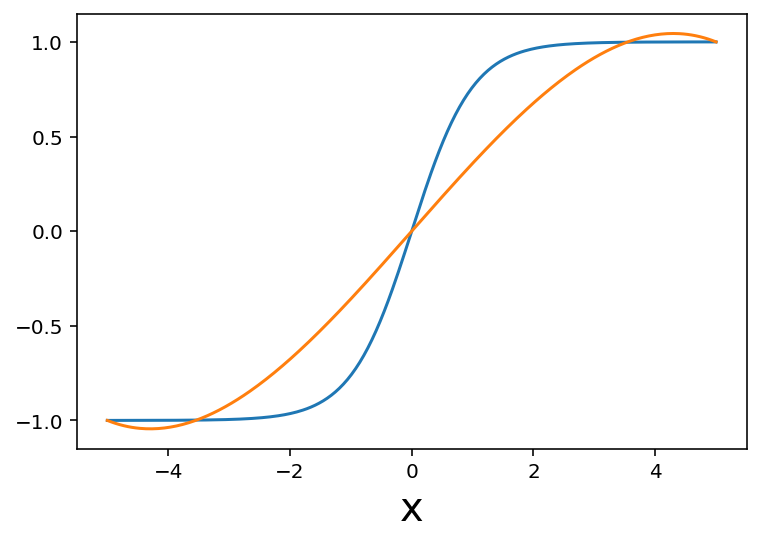

In [10]:
n = 4
weights = baryfit_chebyshev(n)
xnodes = chebyshev_nodes(a, b, n)
ynodes = f(xnodes)

xeval = linspace(a, b, 300)
yeval = baryeval(xeval, xnodes, ynodes, weights)

plot(xeval, f(xeval))

plot(xeval, yeval)
xlabel('x', fontsize=20);

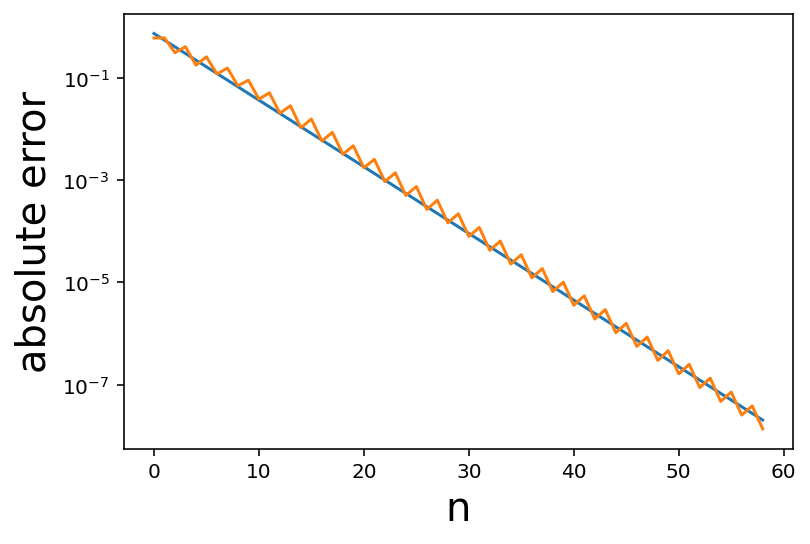

In [12]:
def approx_err(n):
    rho = 1.35 ## I found this constant by fitting to the curve below
    return 1./rho**n
def max_diff(n, N):
    weights = baryfit_chebyshev(n)
    xnodes = chebyshev_nodes(a, b, n)
    ynodes = f(xnodes)
    xeval = linspace(a, b, 300)
    yeval = baryeval(xeval, xnodes, ynodes, weights)
    return absolute(f(xeval) - yeval).max()
y1 = array([approx_err(n) for n in arange(1, 60, 1)])
y2 = array([max_diff(n, 200) for n in arange(1, 60, 1)])


semilogy(y1)
semilogy(y2)
xlabel('n', fontsize=20);
ylabel('absolute error', fontsize=20);

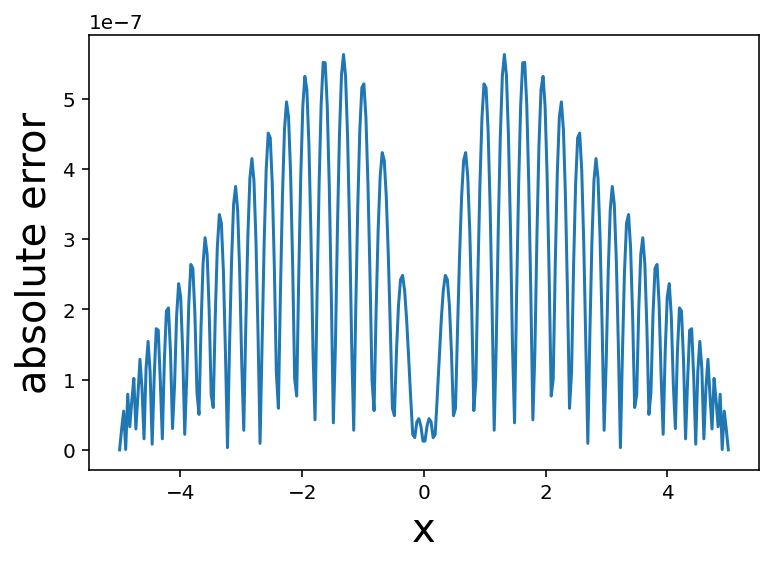

In [13]:
n = 47
weights = baryfit_chebyshev(n)
xnodes = chebyshev_nodes(a, b, n)
ynodes = f(xnodes)

xeval = linspace(a, b, 300)
yeval = baryeval(xeval, xnodes, ynodes, weights)

plot(xeval, absolute(f(xeval) - yeval))
xlabel('x', fontsize=20);
ylabel('absolute error', fontsize=20);